# Part 1: Exploratory Data Analysis - Logins

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

This part of the project inputs a set of logins to a website from 1/1/2017 to 4/13/2017 into a pandas dataframe and performs exporatory data analysis on the data.

The first step is to read the JSON file into a dataframe.

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 14 10:21:15 2020

@author: Paul Scheibal

This is an EDA program which reads a set of signons from 1/1/1970 to 4/13/1970 of a website.

"""

# import necessary packages
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl
import pylab as plb
import matplotlib.mlab as mlab

import warnings
warnings.filterwarnings("ignore")
from IPython.core.pylabtools import figsize
from IPython.display import display
from datetime import datetime
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# set the path and file name of the JSON formatted file
#
PATH = 'C:\\Users\\User\\Documents\\PAUL\\Springboard\\core\\ultimate_challenge\\ultimate_challenge\\'
FILN = 'logins.json'

# mapping of day numbers to day of week nd colors
# colors will be used for line graphs
DOW_TRANSLATOR = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
DOW_COLORS =  {0:'#ff9999',1:'#66b3ff',2:'#99ff99',3:'red',4:'#66aa99',5:'orange',6:'purple'}
        
# this will be used to calculate a simple linear regression for one of the plots.
def calc_poly(x_data,y_data,typ):
    coef= np.polyfit(x_data, y_data, typ)
    polynomial = np.poly1d(coef)
    x = np.arange(min(x_data),max(x_data) + 1,1)
    y = polynomial(x)
    return polynomial,coef,x,y

# plots the linear regression
def plot_poly(xarr,yarr,xp,d,c,w):
    fcnarr = []
    for i in range(0,len(d)):
        typ = d[i]
        poly, coef, x, y = calc_poly(xarr, yarr, typ)
        fcnarr.append(poly)
        plt.plot(xp,y, linewidth=w,color=c[i])
    return fcnarr

# plot routine to plot statistics about the 15 minute interval counts
def plot15(df,clr,lbl):
    
    df15 = df[['hr_min_interval','counts']]
    df15 = df15.groupby(['hr_min_interval']).mean()
    df15 = df15.reset_index(drop=False)
    df15['counts'] = round(df15['counts'])
    df15.counts = df15.counts.astype('int64')
    if lbl == None :
        plt.plot(df15.hr_min_interval, df15.counts, color=clr,linewidth=5)
    else:
        plt.plot(df15.hr_min_interval, df15.counts,label=lbl, color=clr,linewidth=5)
    
    return True

# generic plot routine to plot statements used over and over again
def plot_body(ttl,xlab,ylab,rot,show_legend):
    ax = plt.gca()
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(ttl , fontsize=16)
    plt.grid(True)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(12)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(14)
    if show_legend == True :
        leg = plt.legend()
    plt.xticks(rotation=rot)
    
    return True

# prints plots for all days of the week summary statistics
def plot15_dow_all(df):
    for i in range(7):
        df15 = df[df['day_of_week_num'] == i]
        dow = DOW_TRANSLATOR[i]
        clr = DOW_COLORS[i]
        plot15(df15,clr,dow)
        plot_body('DOW Daily Signons - 15 Minute Intervals - '+dow, 'Daily 15 Minute Intervals', 'Signon Counts',45,True)
    plt.show()

    return True

#  set up JSON file name and read the file into a dataframe.
JSONF = PATH + FILN
# load json
json.load((open(JSONF)))
# load as Pandas dataframe
df = pd.read_json(JSONF)
df = df.sort_values('login_time')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 6 to 93140
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB
None


Next, some additional calculations are performed along with the creation of additional summary dataframes.

In [7]:
#  count logins in 15 minute intervals as well as additional 
#  columns to be used in plots
#
df['count'] = 0
dfagg = df.groupby(pd.Grouper(key='login_time',freq='15min' )).count()
dfagg = dfagg.reset_index(drop=False)
dfagg.columns = ['login_time','counts']
dfagg['hr15'] = dfagg.login_time.dt.strftime('%H')
dfagg['min15'] = dfagg.login_time.dt.strftime('%M')
dfagg['hr_min_interval'] = dfagg.hr15.str.cat(dfagg.min15,sep=':')
dfagg['day_of_week_num'] = dfagg.login_time.dt.dayofweek
dfagg['day_of_week'] = dfagg.day_of_week_num.map(DOW_TRANSLATOR)

# daily stats
dfday = df.groupby(pd.Grouper(key='login_time',freq='D' )).count()
dfday = dfday.reset_index(drop=False)
dfday.columns = ['login_time','counts']

# weekly stats
dfweek = df.groupby(pd.Grouper(key='login_time',freq='W' )).count()
dfweek = dfweek.reset_index(drop=False)
dfweek.columns = ['login_time','counts']
dfweek['weekstr'] = dfweek['login_time'].astype(str)

# day of week stats
dfdowst = dfagg.groupby('day_of_week_num').sum()
dfdowst = dfdowst.reset_index(drop=False)
dfdowst.day_of_week = dfdowst.day_of_week_num.map(DOW_TRANSLATOR)

The following are some summary statistics and plots of the data.# print some initial statistics and histograms/bars.  

The 15 interval counts range from 0 to 73 signons during the approx 4 months.  Most of the 15 interval counts range from 0 to 20.  Saturday is the busiest signon day of week, followed by Sunday and Friday.

As you can see from the weekly plot, the number of signons are increasing with respect to time.



Statistics From 1970-01-01 20:00:00 To 1970-04-13 18:45:00


Total Number of Signons:  93142
Min Number of Signons (per 15 minute interval):  0
Max Number of Signons (per 15 minute interval):  73


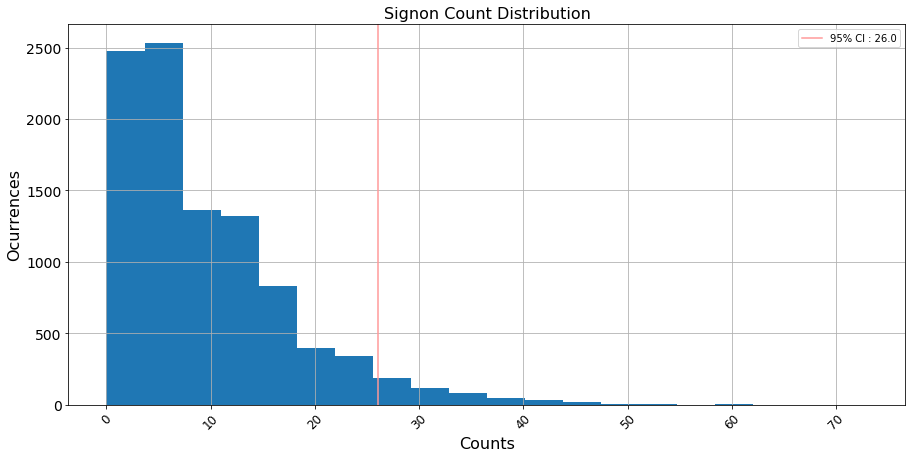

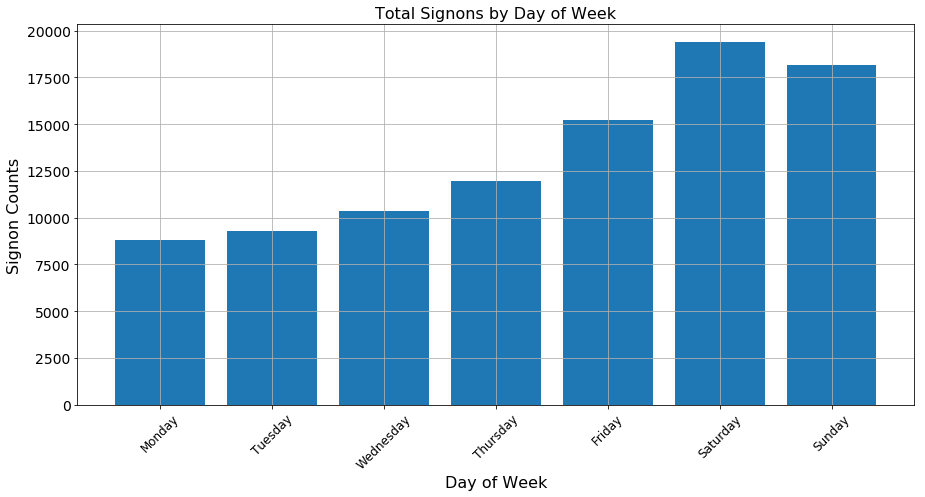

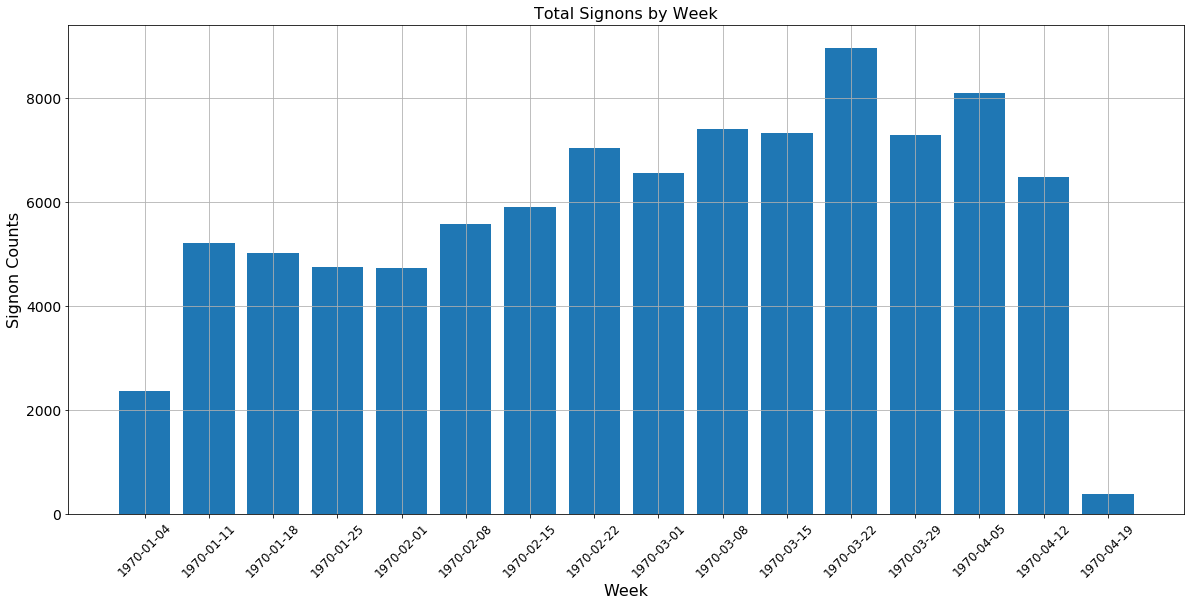

In [26]:
starting_dt = dfagg.login_time.min()
ending_dt = dfagg.login_time.max()
print('\n')
print('Statistics From ' + str(starting_dt) + ' To ' + str(ending_dt))
print('\n')
print('Total Number of Signons: ',dfagg.counts.sum())

print('Min Number of Signons (per 15 minute interval): ',dfagg.counts.min())
print('Max Number of Signons (per 15 minute interval): ',dfagg.counts.max())

# plot histogram of signon count distribution
figsize(15,7)

ptile = np.percentile(dfagg.counts,[95])
lbl = '95% CI : ' + str(ptile[0])
plb.axvline(ptile[0],label=lbl, color='#ff9999')
plt.hist(dfagg.counts,bins= 20)
plot_body('Signon Count Distribution', 'Counts','Ocurrences',45,True)
plt.show()

# plot dow statistics
plt.bar(dfdowst.day_of_week,dfdowst.counts)
plot_body('Total Signons by Day of Week', 'Day of Week','Signon Counts',45,False)
plt.show()

# plot weekly statistics
dfweek['weekstr'] = dfweek['login_time'].astype(str)
figsize(20,9)
ax = plt.gca()
plt.bar(dfweek.weekstr,dfweek.counts)
plot_body('Total Signons by Week', 'Week','Signon Counts',45,False)
plt.show()

Plot 15 minute interval signon counts by DOW and daily averages.  To see the following plots in more detail, double click on the plot image.  

Saturday and Sunday from about midnight to 5am have the most signon activity.  Then between 10:30am and 12:30pm the weekday signons outperform the weekends.  Then from 8pm to 11pm, there is additional activity especially Friday.

On the second plot (overall days activity by 15 minute intervals), the activity from 6:30am to 9am is constant at 2 signons.  This should be investigated.



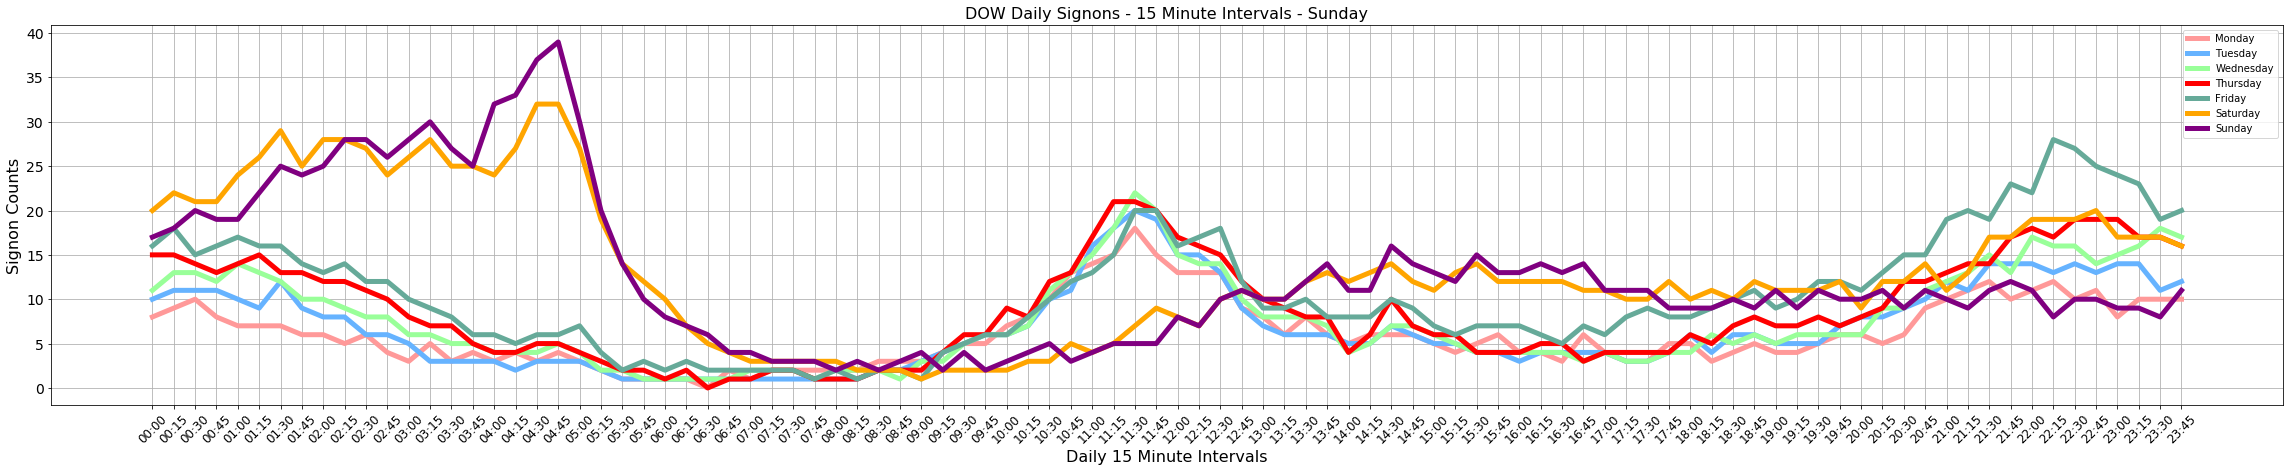

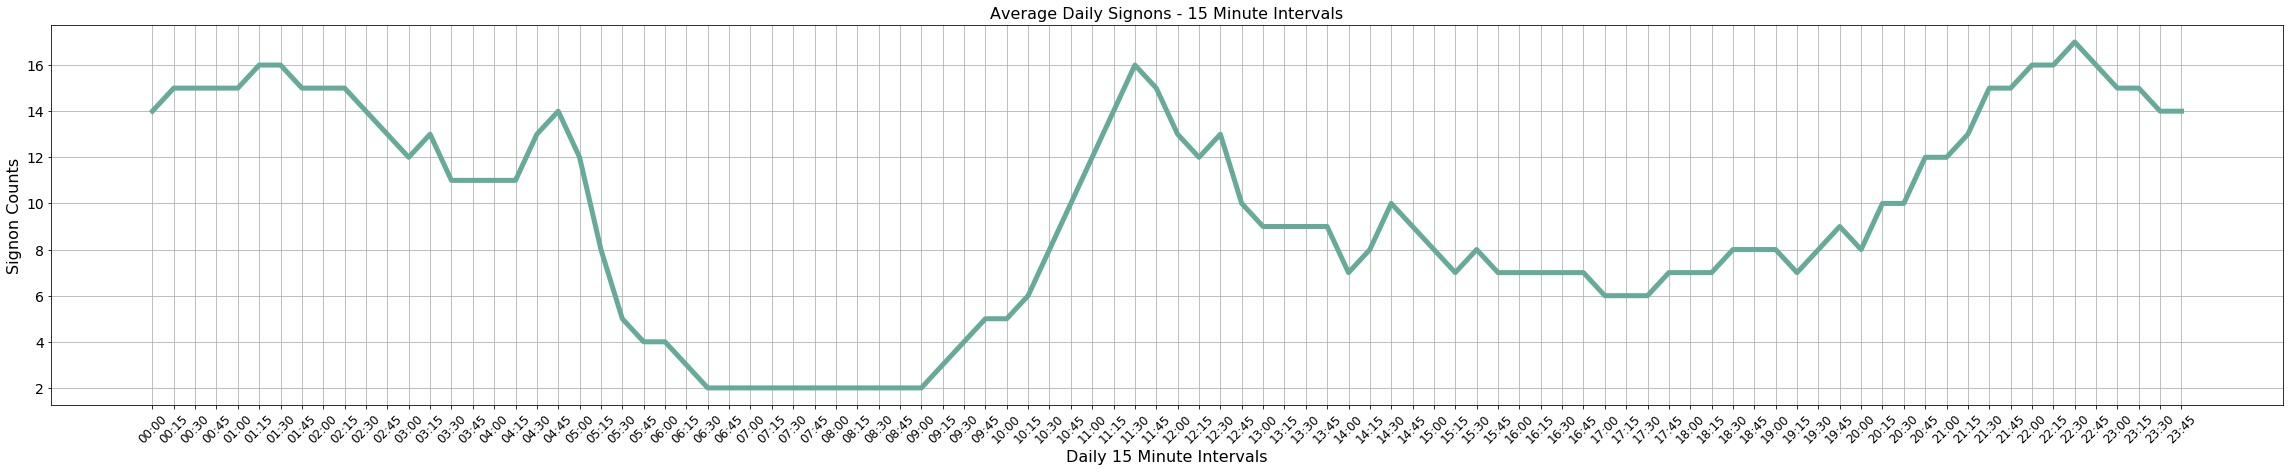

In [22]:
# need a bigger viewing area for folloowing plots
figsize(40,7)

# plot average counts per daily 15 minute interval for all days by day of week
plot15_dow_all(dfagg)

# plot the average counts per daily 15 minute interval for all days
df15avg = dfagg[['hr_min_interval','counts']]
df15avg = dfagg.groupby('hr_min_interval').mean()
df15avg = df15avg.reset_index(drop=False)
df15avg['counts'] = round(df15avg['counts'])
df15avg.counts = df15avg.counts.astype('int64')

plot15(df15avg,'#66aa99','Signon Counts')
plot_body('Average Daily Signons - 15 Minute Intervals', 'Daily 15 Minute Intervals', 'Signon Counts',45,False)
plt.show()


Finally print daily trend plot with linear regression trend line.  To see the following plots in more detail, double click on the plot image.  

As you can see from the plot below there is a clear signon counts upward trend and signon counts are a function of the day of week.

Each Monday is slow and during the week the signons increase gradually to Thursday.  On Friday, the usage spikes and continues until Sunday and starts all over again.

The only exception was 3/17 through 3/19 where Tuesday through Thursday had strong signons.  This would need to be investigaged.

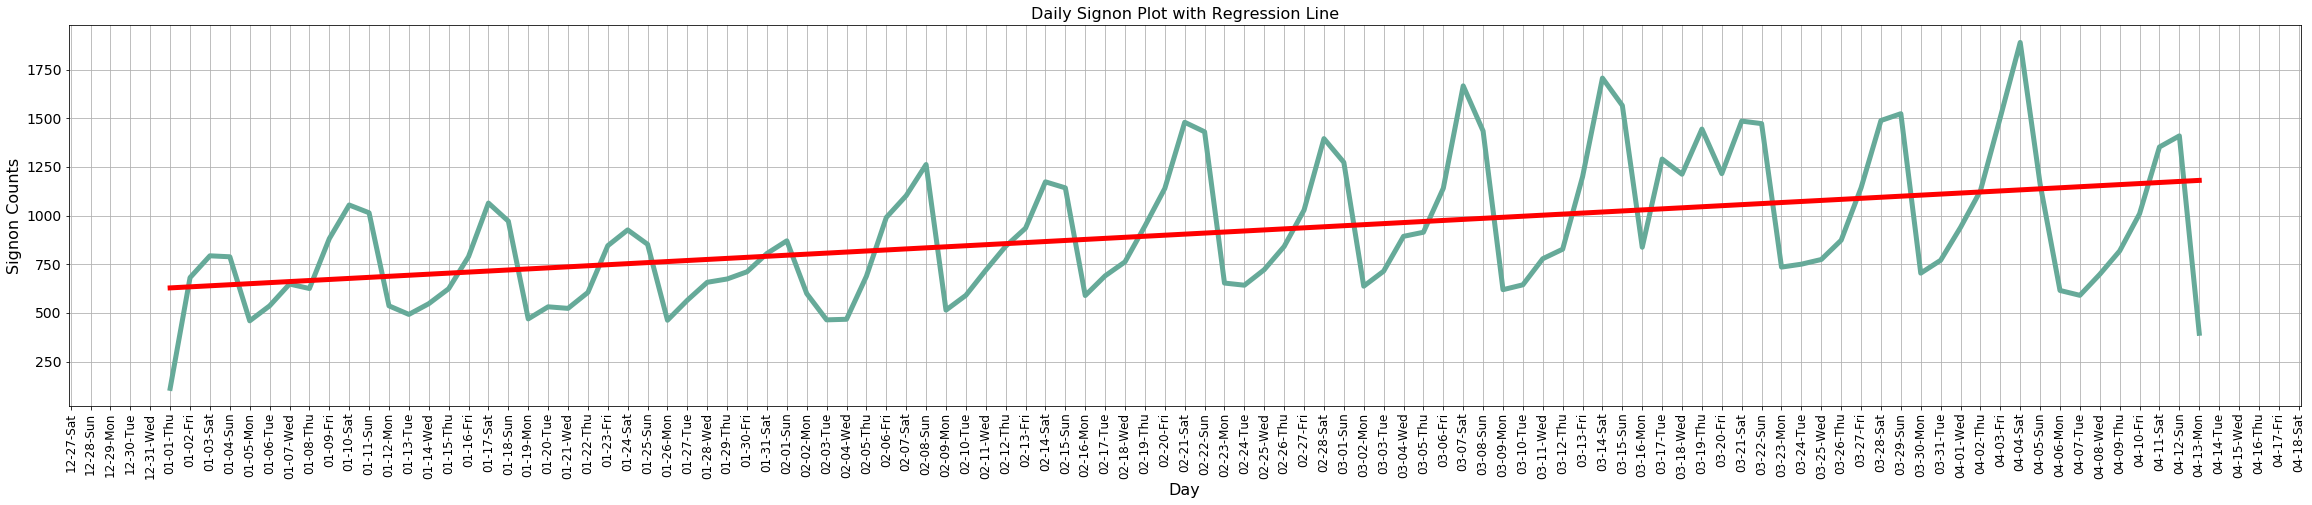

In [23]:
#  plot daily trends for all days
ax = plt.gca()
plt.plot(dfday.login_time, dfday.counts, linewidth=5, color='#66aa99',label='Signon Counts')
degreearr = [1]
colorarr = ['red']
x = np.array(dfday.index)
y = np.array(dfday.counts)
xp = np.array(dfday.login_time)

farr = plot_poly(x,y,xp,degreearr, colorarr, 5)
plot_body('Daily Signon Plot with Regression Line','Day','Signon Counts',90,False)
formatter = mdates.DateFormatter('%m-%d-%a')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.show()


# Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate 
Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is 
reasonable activity in both cities.  

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

    1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve 
       both cities, and why would you choose this metric?
       
       Here are the additional questions I would ask myself.  Did the overall system performance (activity) have a 
       postive or negative impact post reimbursement as compared to pre reimbursement; that is, the overall 
       performance of both locations viewed as a whole, and was it statistically significant?  If so, then I would 
       look at each location to understand where and when the activities had a postive or negative effect. I would 
       also look at the number of reimbursements that were actually claimed.  That would provide insight to driver 
       partners that actually made the trip across the bridge even though they may have made the trip regardless of 
       the reimbursement.  And then what about those who did make the trip due to idea of reimbursment but never 
       actually claimed it.
       
       Ideally, there would be an overall increase in activity viewed from the system as a whole.  And upon further 
       investigation, it would be great to see an increase in activity at night at Ultimate Metropolis and increase in 
       activity during the day at Ultimate Gotham.
       
    2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation 
       to the key measure of success. Please provide details on:
       
        a. How you will implement the experiment?
        
           I would collect daily activities for a specific period of time for pre and post reimbursement. I would then 
           calculate the average daily activity of pre and post reimbursement of the entire system. Care would need to 
           be taken to make sure the samples taken are both "on equal ground".  Historical data could be reviewed to 
           make sure this is the case.
           
        b. What statistical test(s) you will conduct to verify the significance of the observation?
        
           I would implement a two sample test looking at the overall mean activity prior to reimbursement and overall 
           mean activity after reimbursement was put into effect.  To do the two-sample bootstrap test, we shift both 
           arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal.
           The p-value, which is the fraction of replicates with a difference in means greater than or equal to what 
           was observed, would be calculated to see if there is statistical significance. 
           
           The other option would be to do a AB Test.  With this option you have reimbursement and not reimbursement for 
           bridge tolls.  Did reimbursement for tolls result in more converted activity in ultimate gotham in daytime and 
           ultimate metroplis at nighttime.
        
        c. How you would interpret the results and provide recommendations to the city operations team along with 
           any caveat?
           
           If the p-value is very small then the null hypothesis would be rejected.  This would tell us the means
           are different and the reimbursement had an effect.  Then additional analysis would be done to look at 
           more specifics around where the activities increased, decreased or stayed the same. Care should be taken 
           when interpreting p-values as they can be small but still significant; its a relative thing.
           
           For the AB Test, B would be the reimbursement of tolls, A would be toll charge.  Null Hypothesis would be 
           reimbursement does not effect the conversion to additional activities.  Using permutation replicates 
           and p_value of difference in conversion rates, can accept or reject the null hypothesis (relatively low 
           value)

# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

    1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
       data for this analysis (a few sentences/plots describing your approach will suffice). What
       fraction of the observed users were retained?
       
    2. Build a predictive model to help Ultimate determine whether or not a user will be active
       in their 6th month on the system. Discuss why you chose your approach, what
       alternatives you considered, and any concerns you have. How valid is your model?
       Include any key indicators of model performance.
       
    3. Briefly discuss how Ultimate might leverage the insights gained from the model to
       improve its longterm rider retention (again, a few sentences will suffice).

# Data description
    ● city: city this user signed up in
    ● phone: primary device for this user
    ● signup_date: date of account registration; in the form ‘YYYY MM DD’
    ● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
    ● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    ● avg_rating_by_driver: the rider’s average rating over all of their trips
    ● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
    ● surge_pct: the percent of trips taken with surge multiplier > 1
    ● avg_surge: The average surge multiplier over all of this user’s trips
    ● trips_in_first_30_days: the number of trips this user took in the first 30 days after
      signing up
    ● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
      FALSE otherwise
    ● weekday_pct: the percent of the user’s trips occurring during a weekday

# Data Acquisition and Wrangling

There were some values missing from avg_rating_by_driver, avg_rating_of_driver and some phone types 
missing.  For avg_rating_by_driver and avg_rating_of_driver, I used the median values to fill in the 
missing values.  Also calculated was the mean and was tried as well (did not make a big difference).
For the phone type, I just put in "Unspecified".  No data was deleted from the dataframe.  

I also removed spaces and apostrophes from city.

In [16]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 14 10:21:15 2020

@author: Paul Scheibal

This program predicts rider retention of a rider service.  


  
 labels: labels indicate if the account is active or inactive.  The way this 
 was done was to create a column called days_last_trip which is the difference
 of 6/1/2014 and last_trip_date.  The document says we consider a user retained 
 if they were “active” (i.e. took a trip) in the preceding 30 days.  It also says
 build a predictive model to help Ultimate determine whether or not a user 
 will be active in their 6th month on the system.  Since all started in January,
 then the six month will be June.  So 30 days prior to June 1st is the criteria
 I am using to determine if active.

"""

# import necessary packages
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize


import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl
import pylab as plb
import matplotlib.mlab as mlab
from xgboost import plot_importance
from matplotlib import pyplot

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from IPython.core.pylabtools import figsize
from IPython.display import display
from datetime import datetime
import matplotlib.dates as mdates

figsize(13,8)

# set the path and file name of the JSON formatted file
#
PATH = 'C:\\Users\\User\\Documents\\PAUL\\Springboard\\core\\ultimate_challenge\\ultimate_challenge\\'
FILN = 'ultimate_data_challenge.json'
#
## mapping of day numbers to day of week nd colors
## colors will be used for line graphs
#DOW_TRANSLATOR = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
#DOW_COLORS =  {0:'#ff9999',1:'#66b3ff',2:'#99ff99',3:'red',4:'#66aa99',5:'orange',6:'purple'}

#  set up JSON file name and read the file into a dataframe.
JSONF = PATH + FILN

import pandas as pd
import json

with open(JSONF) as f:
   data = json.load(f)
   df = pd.DataFrame(data)

print('\nInfo for DataFrame before Wrangling\n')
print(df.info())

# Data Wrangling Section:
#
# Convert Data Columns to Datetime datatypes
# Convert strings from objects to strings
# Change None for phone to Unspecified so as not to confuse 'None' with None
# any missing Avg Rating of and by Drivers to the median values of each column
#

df['last_trip_date'] = pd.to_datetime(df.last_trip_date , infer_datetime_format=True)  
df['signup_date'] = pd.to_datetime(df.signup_date , infer_datetime_format=True)  
   
df.phone = df.phone.astype(str)
df.city = df.city.astype(str)
df.phone = df.phone.replace('None','Unspecified')

print('\nStatistics for Avg Rating of and by Drivers: \n')
print('Mean of Avg Rating of Drivers',df.avg_rating_of_driver.mean())
print('Mean of Avg Rating by Drivers',df.avg_rating_by_driver.mean())
print('Median of Avg Rating of Drivers',df.avg_rating_of_driver.median())
print('Median of Avg Rating by Drivers',df.avg_rating_by_driver.median())
print('Min of Avg Rating of Drivers',df.avg_rating_of_driver.min())
print('Max of Avg Rating of Drivers',df.avg_rating_of_driver.max())
print('Min of Avg Rating by Drivers',df.avg_rating_by_driver.min())
print('Max of Avg Rating of Drivers',df.avg_rating_by_driver.max())
of_median = df.avg_rating_of_driver.median()
by_median = df.avg_rating_by_driver.median()
of_mean = df.avg_rating_of_driver.mean()
by_mean = df.avg_rating_by_driver.mean()

df.loc[ df.avg_rating_by_driver == np.nan,'avg_rating_by_driver'] = by_median
df.loc[ df.avg_rating_of_driver == np.nan,'avg_rating_of_driver'] = of_median

df.avg_rating_by_driver = df.avg_rating_by_driver.replace(np.nan,by_median)
df.avg_rating_of_driver = df.avg_rating_of_driver.replace(np.nan,of_median)

df.city = df.city.str.replace(" ","")
df.city = df.city.str.replace("'","")
print('\nCity Transformation Results\n')
print(df.groupby('city').first().reset_index(drop=False).city)
print('\nInfo for DataFrame after Wrangling\n')
print(df.info())


Info for DataFrame before Wrangling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None

Statistics for Avg Rating of and by Drivers: 

Mean of Avg Rating of Drivers 4.6015592912744685
Mean of Avg Rating by Drivers 4.778158195947439
Median of Avg Rating of Drivers 4.9
Median of Avg Rat

Next, data is prepared for model execution

In [17]:
# normalize numeric values if zeromean then use zero mean calc, otherwise use min/max calc
def normalize_values(X,cols,cn,type):
    if type == 'zeromean' :
        X[cn] = (X.loc[:,cols] - np.mean(X.loc[:,cols]))/ np.std(X.loc[:,cols])  
    else :
        X[cn] = (X.loc[:,cols] - np.min(X.loc[:,cols])) / ((np.max(X.loc[:,cols]))- np.min(X.loc[:,cols]))
    return X

# normalize categories (like Position)
def normalize_categories(X,cols,prefx):
    X_temp = X[cols]
    X = pd.get_dummies(X,columns=cols,prefix=prefx)
    X[cols] = X_temp
    return X

df['days_last_trip'] = (datetime.strptime('2014-06-01','%Y-%m-%d') - df['last_trip_date']).dt.days 
df['active'] = df.days_last_trip <= 30  # less than 30 indicated a trip within 30 days of June.

# normalize values
df = normalize_values(df, ['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','weekday_pct','surge_pct','trips_in_first_30_days'],
                          ['navg_dist','navg_rating_by_driver','navg_rating_of_driver','navg_surge','nweekday_pct','nsurge_pct','ntrips_in_first_30_days'],
                          'zeromean')

# categories
df = normalize_categories(df,['city','phone'],['city','phone'])

df['vultimate_black_user'] = df.ultimate_black_user.values

print('\nAll Features after normalization and transformed categories:\n')
print(df.info())

feature_set = [
        'avg_dist', 
        'avg_rating_by_driver', 
        'avg_rating_of_driver', 
        'avg_surge',
        'city_Astapor','city_KingsLanding','city_Winterfell',
        'phone_Android','phone_Unspecified','phone_iPhone', 
        'surge_pct',
        'trips_in_first_30_days', 
        'ultimate_black_user', 
        'weekday_pct'
      ]

# normalization did not make a difference
normalized_feature_set = [
        'navg_dist', 
        'navg_rating_by_driver', 
        'navg_rating_of_driver', 
        'navg_surge',
        'city_Astapor','city_KingsLanding','city_Winterfell',
        'phone_Android','phone_Unspecified','phone_iPhone', 
        'nsurge_pct',
        'ntrips_in_first_30_days', 
        'ultimate_black_user', 
        'nweekday_pct'
      ]

X = df[feature_set]
y = df.active


All Features after normalization and transformed categories:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
avg_dist                   50000 non-null float64
avg_rating_by_driver       50000 non-null float64
avg_rating_of_driver       50000 non-null float64
avg_surge                  50000 non-null float64
last_trip_date             50000 non-null datetime64[ns]
signup_date                50000 non-null datetime64[ns]
surge_pct                  50000 non-null float64
trips_in_first_30_days     50000 non-null int64
ultimate_black_user        50000 non-null bool
weekday_pct                50000 non-null float64
days_last_trip             50000 non-null int64
active                     50000 non-null bool
navg_dist                  50000 non-null float64
navg_rating_by_driver      50000 non-null float64
navg_rating_of_driver      50000 non-null float64
navg_surge                 50000 non-null float64
nweekday_pct            

Finally, execution of machine learning algorithms.

2020-03-06 10:29:08.655186


Random Forests


Accuracy on training set is : 0.7658285714285714
Accuracy on test set is : 0.7614
              precision    recall  f1-score   support

       False       0.75      0.76      0.75      7134
        True       0.78      0.77      0.77      7866

   micro avg       0.76      0.76      0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.76      0.76      0.76     15000

[[5397 1737]
 [1842 6024]]

Feature Importances:

                      name      coef
1     avg_rating_by_driver  0.206610
13             weekday_pct  0.167488
11  trips_in_first_30_days  0.161196
10               surge_pct  0.139789
3                avg_surge  0.101023
5        city_KingsLanding  0.067209
0                 avg_dist  0.032882
2     avg_rating_of_driver  0.031277
12     ultimate_black_user  0.026416
9             phone_iPhone  0.023591
7            phone_Android  0.020469
4             city_Astapor  0.012863
6          cit

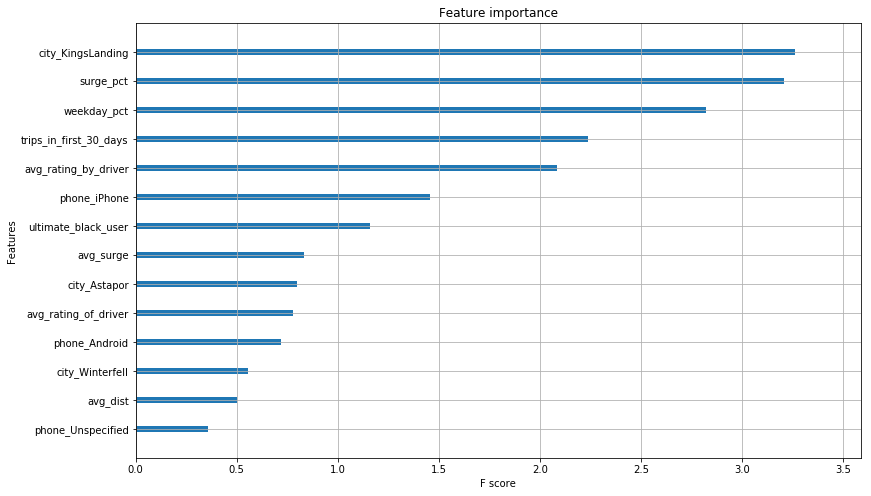


Feature Importance by weight : 



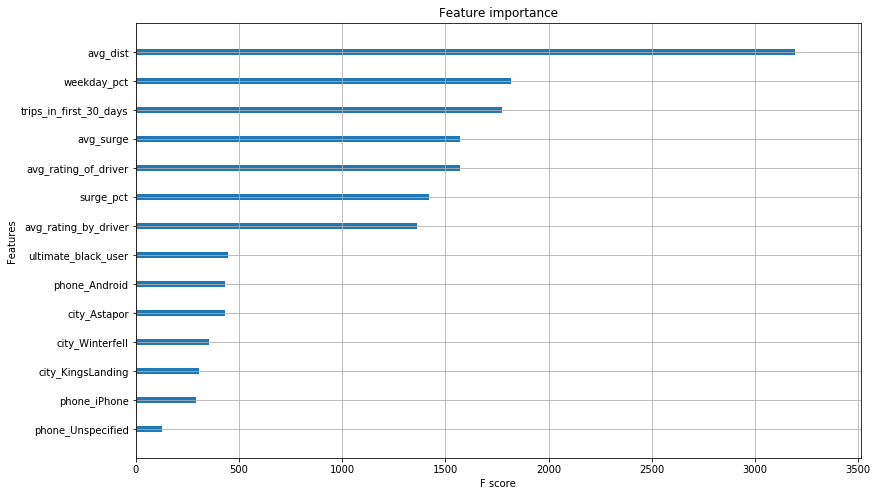


Feature Importance by cover : 



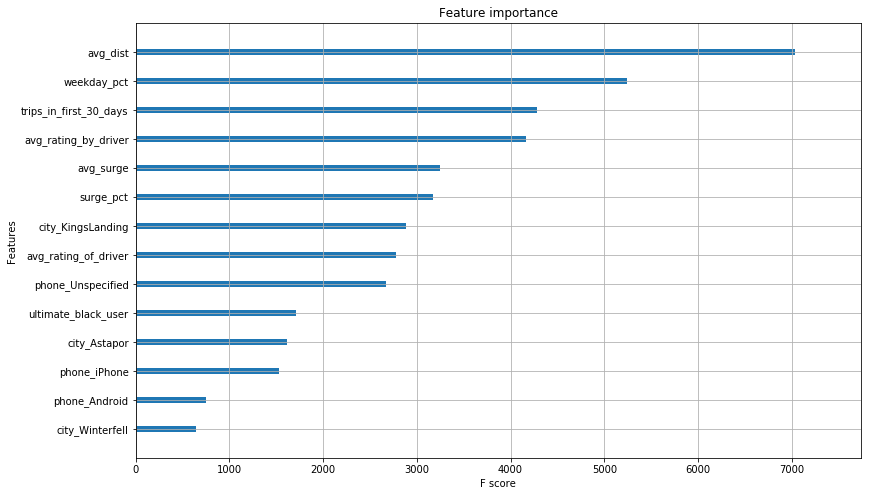


Feature Importance by total_gain : 



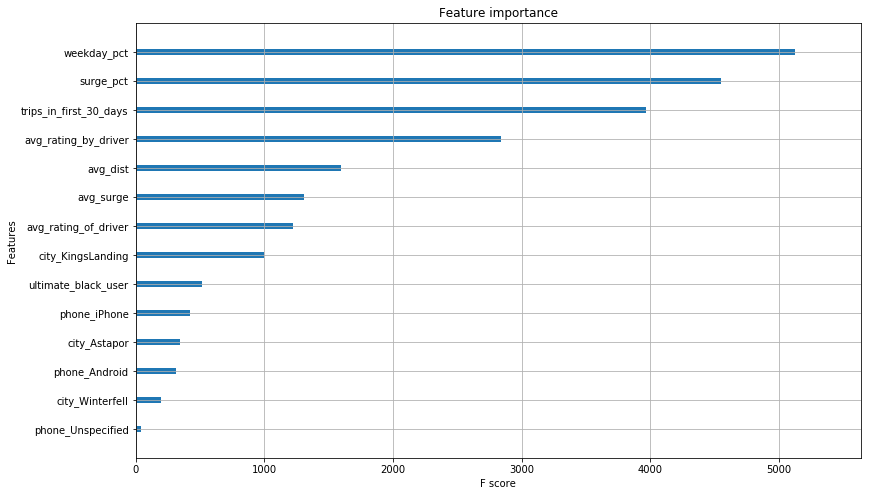


Feature Importance by total_cover : 



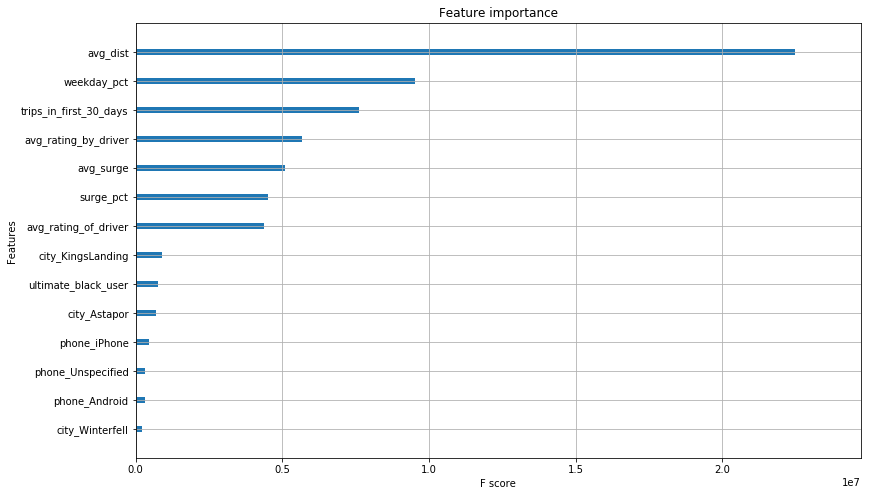

2020-03-06 10:30:46.788430


Knn Classifier


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   33.2s remaining:   33.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   47.8s finished


Accuracy on training set is : 0.7949714285714286
Accuracy on test set is : 0.7412666666666666
              precision    recall  f1-score   support

       False       0.73      0.72      0.73      7134
        True       0.75      0.76      0.76      7866

   micro avg       0.74      0.74      0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

[[5136 1998]
 [1883 5983]]
{'n_neighbors': 9}


In [18]:
# print featues and importances
def print_coefs(features, coefs):
    print('\nFeature Importances:\n')
    df = pd.DataFrame()
    for i in range(len(features)):
        df.loc[i, 'name'] = features[i]
        df.loc[i, 'coef'] = coefs[i]
    print(df.sort_values('coef', ascending = False))
    
    return True
    
def plot_coefs(model):
    for i in ['gain','weight','cover','total_gain','total_cover']:
        print('\nFeature Importance by '+i+' : \n')
        plot_importance(model, importance_type=i, max_num_features=20,show_values=False)
        pyplot.show()
    
    return True

def execute_classifiers(X_train, y_train, X_test, y_test):

    ########################################### Random Forest ##########################################
   
    print(datetime.now())
    print('\n')
    print('Random Forests')
    print('\n')
    
#    params = {
#            'n_estimators': [2000],
#            'max_features': ['auto'],
#            'max_depth':[8], 
#            'min_samples_split': [5],
#            'min_samples_leaf': [2]
#        }
    rf_cls = RandomForestClassifier(
                        n_estimators=2000,
                        max_features='auto',
                        max_depth=8, 
                        min_samples_split=5,
                        min_samples_leaf=2,
                        verbose=0,
                        n_jobs=-1)
#    gs = GridSearchCV(estimator=rf_cls,param_grid=params,cv=2,n_jobs = -1,verbose = 2)    
    rf_cls.fit(X_train, y_train)    
 
    print("Accuracy on training set is : {}".format(rf_cls.score(X_train, y_train)))
    print("Accuracy on test set is : {}".format(rf_cls.score(X_test, y_test)))
    y_pred = rf_cls.predict(X_test) 
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred)) 
#    print(gs.best_params_)
    print_coefs(X_test.columns, rf_cls.feature_importances_)
    
    ############################################ XGBoost ###############################################
   
    print(datetime.now())
    print('\n')
    print('XGB Classifier')
    print('\n')

    params = {
                'colsample_bytree': [0.6],
                'learning_rate':[0.1],
                'n_estimators': [300],
                'max_depth':[6], #5
                'alpha':[0.01],
                'gamma':[0.01],
                'subsamples':[0.6]
            }
    
    xgb_cls = XGBClassifier(objective = 'reg:squarederror',
                            colsample_bytree=0.6,
                            learning_rate=0.1,
                            n_estimators=300,
                            max_depth=6,
                            alpha=0.01,
                            gamma=0.01,
                            subsamples=0.6
                            )    
#    gs = GridSearchCV(estimator=xgb_cls,param_grid=params,cv=2,n_jobs = -1,verbose = 2)    
    xgb_cls.fit(X_train, y_train)      
    
    print("Accuracy on training set is : {}".format(xgb_cls.score(X_train, y_train)))
    print("Accuracy on test set is : {}".format(xgb_cls.score(X_test, y_test)))
    y_pred = xgb_cls.predict(X_test) 
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))  
    print_coefs(X_test.columns, xgb_cls.feature_importances_)
    plot_coefs(xgb_cls)
   
    ############################################ Knn ##################################################
    
    print(datetime.now())
    print('\n')
    print('Knn Classifier')
    print('\n')
    params = {
        'n_neighbors': [7,8,9] 
        }

    knn_cls = KNeighborsClassifier()
    gs = GridSearchCV(estimator=knn_cls,param_grid=params,cv=2,n_jobs = -1,verbose = 2)    
    gs.fit(X_train, y_train)    
 
    print("Accuracy on training set is : {}".format(gs.score(X_train, y_train)))
    print("Accuracy on test set is : {}".format(gs.score(X_test, y_test)))
    y_pred = gs.predict(X_test) 
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(gs.best_params_)
# train and run models
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3, random_state=61)
execute_classifiers(X_train, y_train, X_test, y_test)    

# Score Discussion

The ML Algorithms that were run initially were Random Forests, Extreme Gradient Boosting, Knn, SVM and Logistic 
Regression.  The final run used only Random Forests, Extreme Gradient Boosting, Knn as they were the best scores.
Extreme Gradient Boosting had the best accuracy score of 0.77 followed by Random Forests with accuracy score of 0.76
and Knn with accuracy score of 0.74.  

Initially, GridSearchCV was used to find the optimal parameters with CV=5.  Once the parameters were found, the 
algorithms were run with the optimal parameters.  Numeric columns were normalized, but did not appear to make
a big difference.

I would have hoped for better scores.  Perhaps some additional features are missing.  Research should be done in
this area.


# Feature Importance Discussion

The feature importance in predicting whether someone will be active or inactive for random forests is as follows:

                                      name      coef
                1     avg_rating_by_driver  0.206610
                13             weekday_pct  0.167488
                11  trips_in_first_30_days  0.161196
                10               surge_pct  0.139789
                3                avg_surge  0.101023
                5        city_KingsLanding  0.067209
                0                 avg_dist  0.032882
                2     avg_rating_of_driver  0.031277
                12     ultimate_black_user  0.026416
                9             phone_iPhone  0.023591
                7            phone_Android  0.020469
                4             city_Astapor  0.012863
                6          city_Winterfell  0.008443
                8        phone_Unspecified  0.000745
                
The number one predictor was avg_rating_by_driver which the is riders average rating over all of their trips.  
This would make sense as customer satisfaction is important regarding service.  Also, weekday_pct makes sense
as well as it may be weekdays are working days and riders use the service to go to work possibly.  And
trips made in first 30 days are a factor as well.  

It is interesting to note that XGBoost had a different set of feature importance as follows:

                                     name      coef
                5        city_KingsLanding  0.157100
                10               surge_pct  0.154560
                13             weekday_pct  0.135936
                11  trips_in_first_30_days  0.107658
                1     avg_rating_by_driver  0.100278
                9             phone_iPhone  0.070047
                12     ultimate_black_user  0.055801
                3                avg_surge  0.040048
                4             city_Astapor  0.038525
                2     avg_rating_of_driver  0.037378
                7            phone_Android  0.034696
                6          city_Winterfell  0.026742
                0                 avg_dist  0.024122
                8        phone_Unspecified  0.017109
                
This highlights the importance of knowing your data.  city_KingsLanding is the number 1 feature regarding
importance and the metric shows average gain.  If you look at total gain, the numbers are more in
line with random forests.  If total gain is looked at for XGBoost, then the feature importance is as follows:

                        weekday_pct
                        surge_pct
                        trips_in_first_30_days
                        avg_rating_by_driver
                        avg_dist
                        avg_surge
                        avg_rating_of_driver
                        city_KingsLanding
                        ultimate_black_user
                        phone_iPhone
                        city_Astapor
                        phone_Android
                        city_Winterfell
                        phone_Unspecified
                        
These are more in line with random forests and if these findings are true, then possibly customer service
initiatives along with marketing campaigns to attract more weekday riders.  Additional research is needed 
to look at why city_KingsLanding is the number one feature of importance for average gain.  It was number
six for random forests.  So, there might be a reason for this.  